In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd.data import Base

In [3]:
db = Base()

Initializing database connection...
Database connected!


In [4]:
from xy import xy

In [5]:
from shapely.geometry import Point

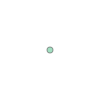

In [6]:
Point(xy)

In [8]:
# first get a geometry

In [7]:
from nbhd.geometry import pointbox

geom = pointbox(Point(xy), 100)

In [10]:
# then get nearest properties and roads for given geometry

In [11]:
import geopandas as gpd

In [12]:
from nbhd.geometry import trim

In [13]:
from shapely.geometry import MultiPolygon, Polygon

In [14]:
bdgs = db.query(db.spatial_sql('buildings','intersects',geom), spatial=True)

In [15]:
bdgs.geometry = bdgs.geometry.apply(lambda x: trim(x, geom))

In [16]:
bdgs_geom = MultiPolygon([q for p in bdgs.geometry.apply(lambda x: list(x)).values for q in p])

In [17]:
df = db.knn('properties','roads', bdgs_geom,geom,condition2="roads.road_function NOT LIKE 'Secondary Access Road'")

In [18]:
local_props = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkb(df.geometry_1))
local_rds =  gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkb(df.geometry_2))

In [19]:
local_props=gpd.GeoDataFrame(df.id_2, geometry=gpd.GeoSeries.from_wkb(df.geometry_1))

In [20]:
from nbhd.geometry import trim

In [21]:
local_rds.geometry = local_rds.geometry.apply(lambda x: trim(x, geom))

In [22]:
import matplotlib.pyplot as plt

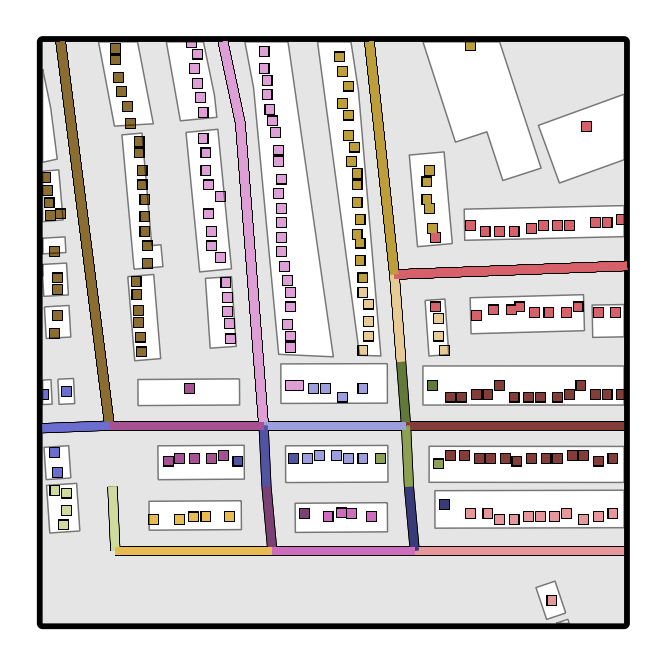

In [23]:
f, ax = plt.subplots(figsize=(12,12))

cmap='tab20b'

gpd.GeoSeries(geom).plot(ax=ax,color='black',alpha=0.1)
bdgs.plot(ax=ax, color='white')
bdgs.boundary.plot(ax=ax, color='k',alpha=0.5)
# local_props.plot('id_2', ax=ax, markersize=50, cmap='Dark2', marker='o', alpha=0.6)
local_props.plot(ax=ax, markersize=90, color='k', marker='s')
local_props.plot('id_2', ax=ax, markersize=60, cmap=cmap, marker='s')
local_rds.plot(ax=ax, linewidth=10, color='k')
local_rds.plot('id_2', ax=ax, linewidth=8, cmap=cmap)
gpd.GeoSeries(geom.buffer(1).boundary.buffer(1)).plot(ax=ax,color='k')
ax.set_axis_off()